In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [46]:
df = pd.read_csv('/content/drive/MyDrive/Data Analytics and Data Mining/Assignment/cleaned_en_mc_scaled.csv')
df.head()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,...,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_3.0,floorType_4.0
0,0.872912,0.092738,0.084675,0.195422,0.250,0.2,0.333333,0.142857,0.833333,2.028094e-08,...,0,0,0,0,0,0,0,0,1,0
1,0.538186,0.110236,0.117329,0.197604,0.250,0.4,0.333333,0.285714,0.818182,6.523868e-08,...,0,0,0,0,0,0,0,0,1,0
2,0.757757,0.041995,0.210188,0.301329,0.375,0.4,0.333333,0.428571,0.833333,4.855436e-08,...,0,0,0,0,0,0,0,0,0,0
3,0.575179,0.120735,0.060695,0.200164,0.375,0.2,0.333333,0.142857,0.878788,2.587568e-08,...,0,0,0,0,0,0,1,0,0,0
4,0.552506,0.250219,0.079981,0.116387,0.250,0.2,0.333333,0.142857,0.151515,3.187004e-08,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df.shape

(314087, 45)

In [48]:
from sklearn.model_selection import train_test_split

In [25]:
X_g = df.drop(['price', 'totalPrice'], axis=1)
y_g = df['price']

In [13]:
# Grid 20
# X_g = df.drop(['price', 'totalPrice', '[8,8]', '[14,8]', 'drawingRoom', 'ladderRatio', 'buildingStructure_5.0', 'subway_1.0', 'district_2.0', 'district_3.0', 'district_4.0', 'district_11.0', 'district_12.0', 'floorType_0.0', 'floorType_1.0', 'floorType_3.0', '[0,0]', '[1,0]', '[1,10]', '[3,0]', '[3,2]', '[4,3]', '[4,4]', '[4,11]', '[4,14]', '[5,4]', '[6,7]', '[6,8]', '[6,9]', '[6,15]', '[7,3]', '[7,14]', '[8,2]', '[8,4]', '[8,5]', '[8,12]', '[9,3]', '[9,4]', '[9,6]', '[9,10]', '[9,14]', '[10,4]', '[10,5]', '[10,10]', '[10,14]', '[10,15]', '[11,4]', '[11,5]', '[11,13]', '[12,7]', '[12,8]', '[12,9]', '[12,12]', '[13,17]', '[14,3]', '[14,6]', '[15,2]', '[15,5]', '[15,6]', '[15,7]', '[15,10]', '[15,12]', '[15,14]', '[16,2]', '[16,5]', '[16,17]', '[16,10]', '[16,11]', '[17,8]', '[17,11]', '[18,3]', '[18,4]', '[18,6]', '[18,7]', '[18,19]', '[19,1]', '[19,5]', '[19,9]'], axis=1)
# y_g = df['price']

In [26]:
# Grid 10
# X_g = df.drop(['price', 'totalPrice', 'drawingRoom', 'constructionTime', 'ladderRatio', 'buildingStructure_2.0',
#     'buildingStructure_5.0', 'district_2.0', 'district_3.0', 'district_4.0',
#     'district_6.0', 'district_8.0', 'district_11.0', 'district_12.0',
#     'district_13.0', 'floorType_0.0', 'floorType_1.0', 'floorType_3.0',
#     '[0,0]', '[0,3]', '[0,4]', '[0,5]', '[1,1]', '[1,4]', '[1,7]',
#     '[2,1]', '[2,3]', '[2,5]', '[2,6]', '[2,8]', '[3,1]', '[3,2]',
#     '[3,5]', '[3,6]', '[3,8]', '[4,7]', '[5,0]', '[5,1]', '[6,1]',
#     '[6,2]', '[6,4]', '[6,5]', '[7,1]', '[7,2]', '[7,4]', '[7,6]',
#     '[7,7]', '[7,9]', '[8,1]', '[8,4]', '[8,5]', '[8,8]', '[9,0]',
#     '[9,3]', '[9,4]'], axis=1)
# y_g = df['price']

In [49]:
# District
X_g = df.drop(['price', 'totalPrice', 'ladderRatio', 'buildingStructure_1.0', 'buildingStructure_2.0',
    'buildingStructure_5.0', 'district_2.0', 'district_3.0',
    'district_7.0', 'floorType_0.0', 'floorType_1.0', 'floorType_3.0'], axis=1)
y_g = df['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X_g, y_g, test_size=0.33, random_state=42)

In [51]:
rf = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [53]:
y_pred_train = rf.predict(X_train)

In [54]:
print('R2 score:', r2_score(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSLE:', np.sqrt(mean_squared_log_error(y_train, y_pred_train)))

R2 score: 0.9750372604491931
MSE: 0.00047784456084163263
RMSE: 0.021859656009224678
RMSLE: 0.016293764083023535


In [57]:
y_pred = rf.predict(X_test)

In [58]:
print('R2 score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

R2 score: 0.860864381972344
MSE: 0.002640682174105901
RMSE: 0.051387568283641334
RMSLE: 0.03825434606252767


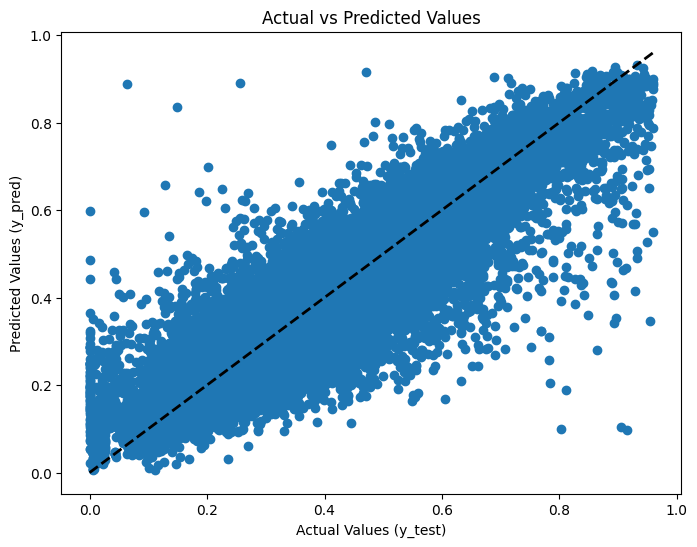

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.show()